In [76]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from textwrap import wrap
import matplotlib.dates as mdates
import matplotlib.axes as ax
import datetime
from tabulate import tabulate
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

%config InlineBackend.figure_format='png'

# set the date format for plots
dtFmt = mdates.DateFormatter('%b-%Y')

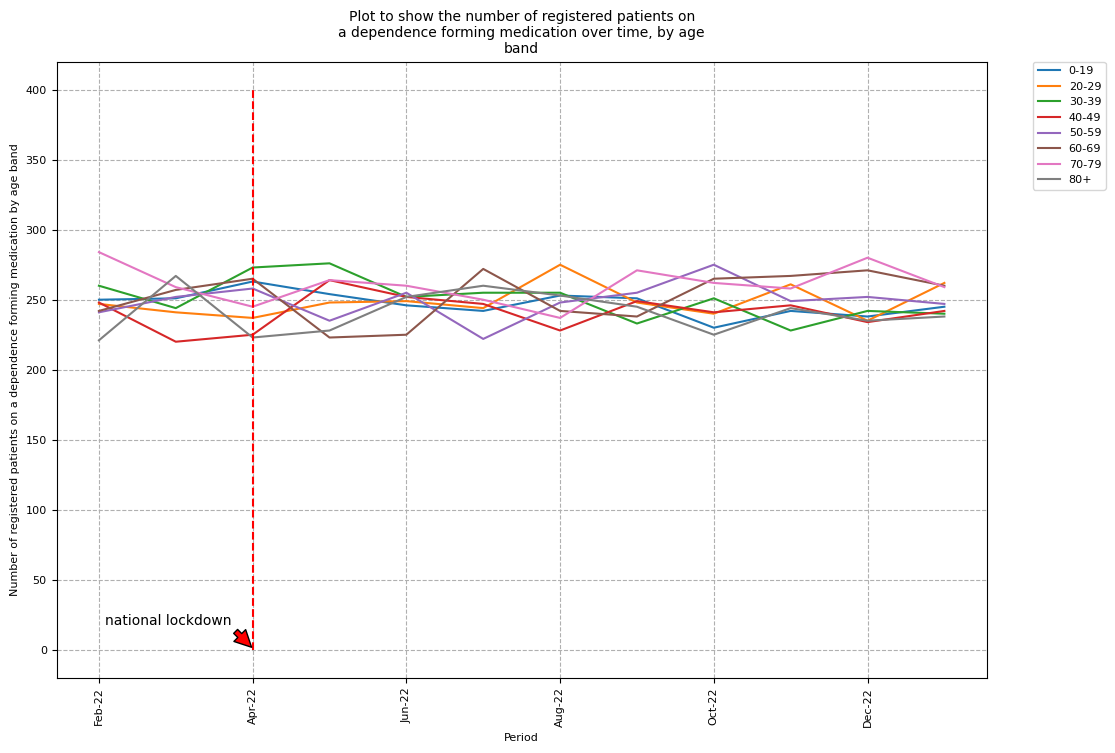

In [77]:
data_measure_dfm_medications_age_rate = pd.read_csv("../output/measure_dfm_medications_by_age_band_rate.csv", parse_dates=["date"])
data_measure_dfm_medications_age_rate = data_measure_dfm_medications_age_rate.loc[data_measure_dfm_medications_age_rate["age_band"] != "missing", :]
df_measure_dfm_medications_age_rate = pd.DataFrame.pivot(data_measure_dfm_medications_age_rate, index='date', columns='age_band', values='research_population')
df_measure_dfm_medications_age_rate.index = pd.to_datetime(df_measure_dfm_medications_age_rate.index).strftime('%b-%y')
ax = df_measure_dfm_medications_age_rate.plot(fontsize=8, figsize=(12,8))
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication by age band', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=400,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=7)
title = 'Plot to show the number of registered patients on a dependence forming medication over time, by age band'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_age_band_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()



In [78]:
print(tabulate(df_measure_dfm_medications_age_rate.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_measure_dfm_medications_age_rate.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
------  ------  -------  -------  -------  -------  -------  -------  -----
Feb-22     250      247      260      248      241      242      284    221
date      0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
------  ------  -------  -------  -------  -------  -------  -------  -----
Jan-23     245      262      240      242      247      260      259    238


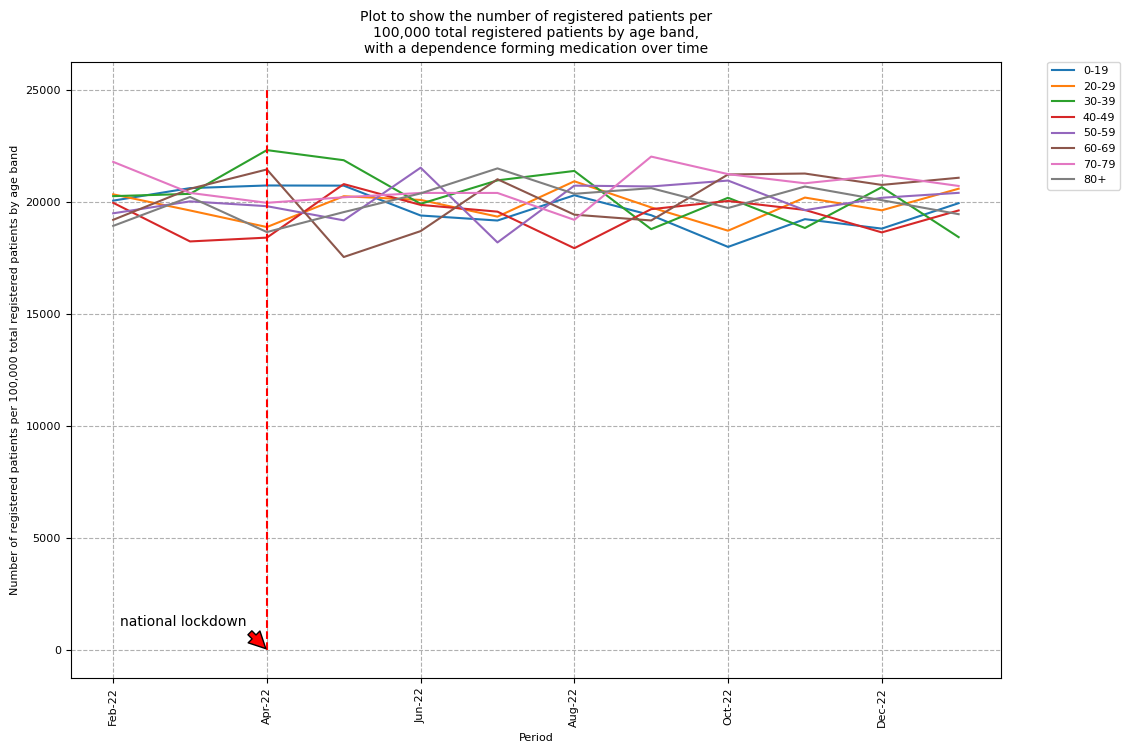

In [79]:
df_temp = pd.DataFrame(data_measure_dfm_medications_age_rate)
df_age_research_population=df_temp.assign(weighted_research_population=lambda x: x.research_population / (x.population / 100000))
df_age_research_population = pd.DataFrame.pivot(df_age_research_population, index='date', columns='age_band', values='weighted_research_population')
df_age_research_population.index = pd.to_datetime(df_age_research_population.index).strftime('%b-%y')
ax = df_age_research_population.plot(fontsize=8, figsize=(12,8))
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients per 100,000 total registered patients by age band', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=25000,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=7)
title = 'Plot to show the number of registered patients per 100,000 total registered patients by age band, with a dependence forming medication over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_age_band_weighted_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [80]:
print(tabulate(df_age_research_population.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_age_research_population.iloc[-1:], headers='keys', tablefmt = 'simple'))

date       0-19    20-29    30-39    40-49    50-59    60-69    70-79      80+
------  -------  -------  -------  -------  -------  -------  -------  -------
Feb-22  20048.1  20329.2  20249.2  19951.7  19482.6  19191.1  21779.1  18921.2
date       0-19    20-29    30-39    40-49    50-59    60-69    70-79      80+
------  -------  -------  -------  -------  -------  -------  -------  -------
Jan-23  19934.9  20581.3    18419    19611  20396.4  21069.7  20703.4  19444.4


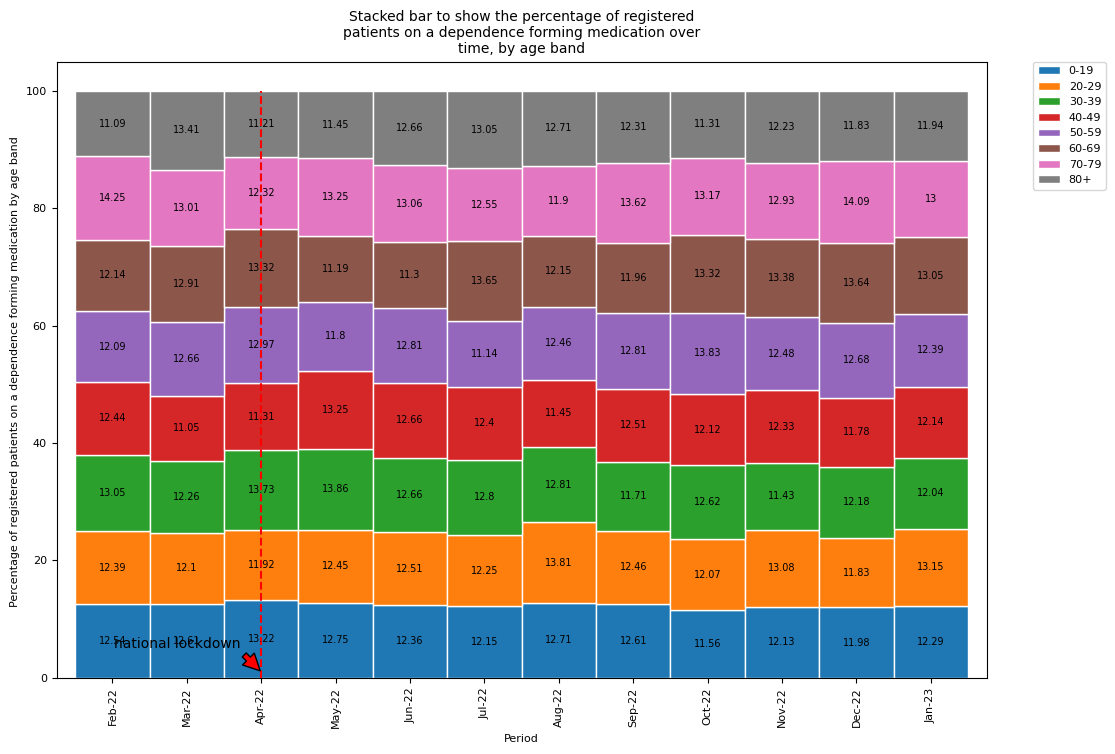

In [81]:
df_age_stacked = pd.DataFrame(df_measure_dfm_medications_age_rate)
df_age_stacked.head()
tot = df_age_stacked.sum(axis=1)
per = df_age_stacked.div(tot, axis=0).mul(100).round(2)
ax = per.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients on a dependence forming medication by age band ', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=7)
title = 'Stacked bar to show the percentage of registered patients on a dependence forming medication over time, by age band'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_age_band_rate_bar.png", bbox_inches='tight', dpi=150)
plt.show()

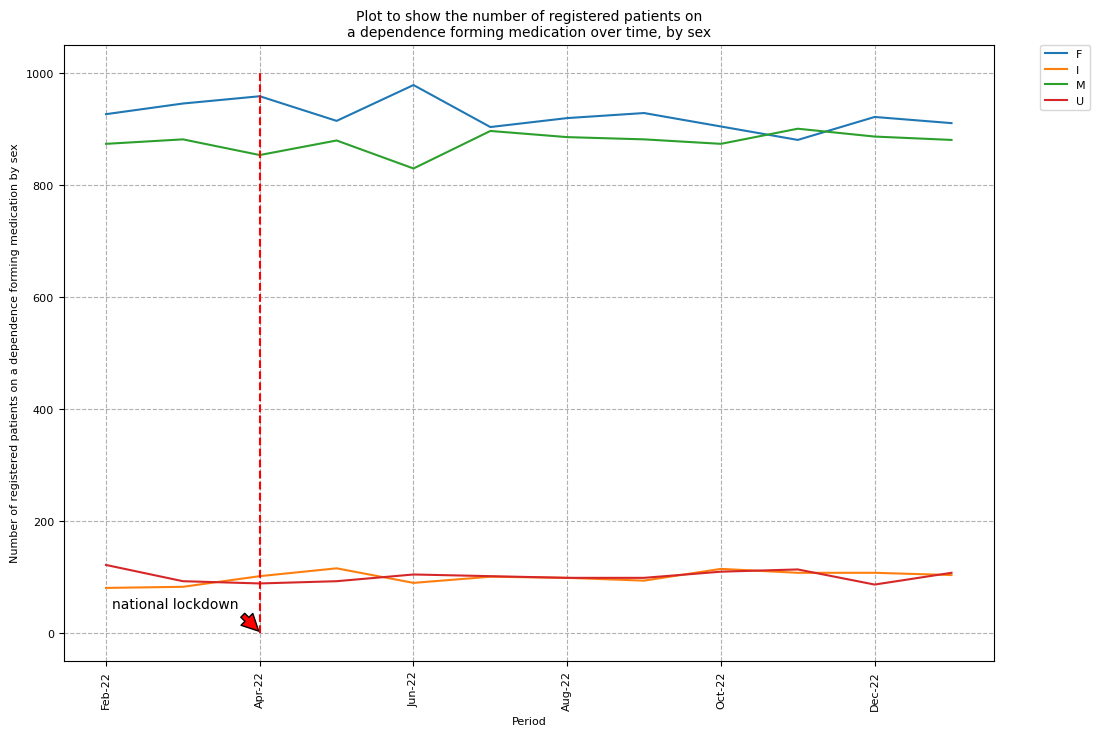

In [82]:
data_measure_dfm_medications_sex_rate = pd.read_csv("../output/measure_dfm_medications_by_sex_rate.csv", parse_dates=["date"])
df_measure_dfm_medications_sex_rate = pd.DataFrame.pivot(data_measure_dfm_medications_sex_rate, index='date', columns='sex', values='research_population')
df_measure_dfm_medications_sex_rate.index = pd.to_datetime(df_measure_dfm_medications_sex_rate.index).strftime('%b-%y')
ax = df_measure_dfm_medications_sex_rate.plot(fontsize=8, figsize=(12,8))
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication by sex', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=1000,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=7)
title = 'Plot to show the number of registered patients on a dependence forming medication over time, by sex'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_sex_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [83]:
print(tabulate(df_measure_dfm_medications_sex_rate.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_measure_dfm_medications_sex_rate.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      F    I    M    U
------  ---  ---  ---  ---
Feb-22  926   80  873  121
date      F    I    M    U
------  ---  ---  ---  ---
Jan-23  910  103  880  107


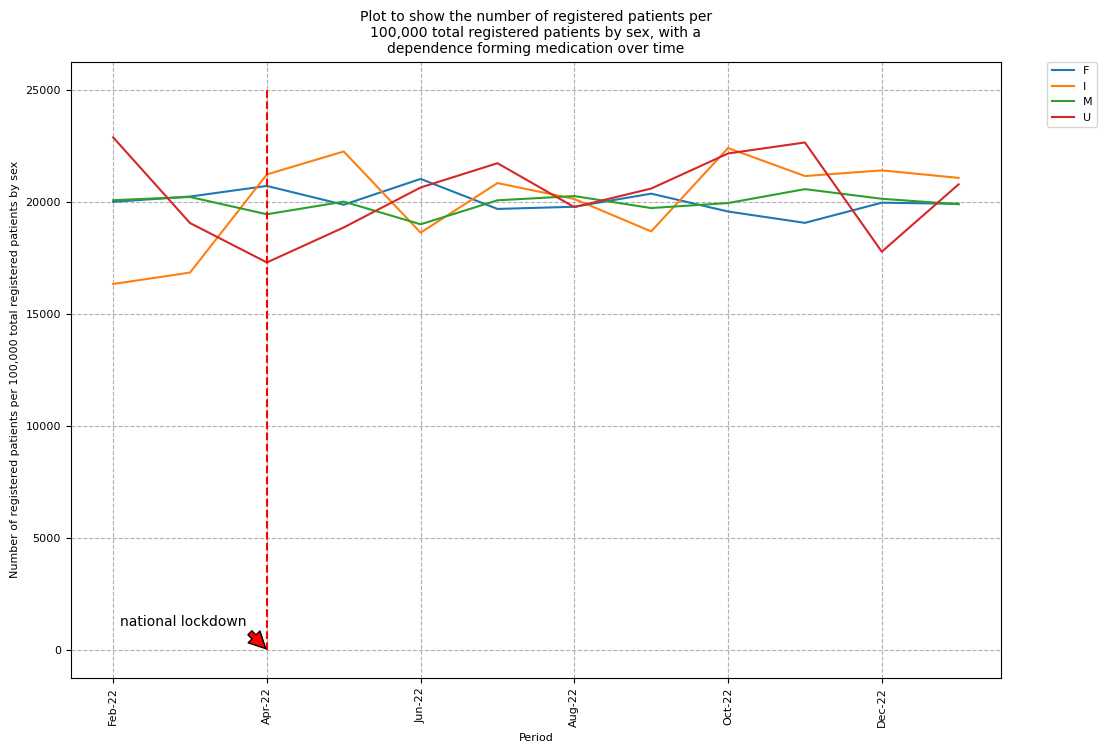

In [84]:
df_temp = pd.DataFrame(data_measure_dfm_medications_sex_rate)
df_sex_research_population=df_temp.assign(weighted_research_population=lambda x: x.research_population / (x.population / 100000))
df_sex_research_population = pd.DataFrame.pivot(df_sex_research_population, index='date', columns='sex', values='weighted_research_population')
df_sex_research_population.index = pd.to_datetime(df_sex_research_population.index).strftime('%b-%y')
ax = df_sex_research_population.plot(fontsize=8, figsize=(12,8))
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients per 100,000 total registered patients by sex', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=25000,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=7)
title = 'Plot to show the number of registered patients per 100,000 total registered patients by sex, with a dependence forming medication over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_sex_weighted_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [85]:
print(tabulate(df_sex_research_population.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_sex_research_population.iloc[-1:], headers='keys', tablefmt = 'simple'))

date          F        I      M        U
------  -------  -------  -----  -------
Feb-22  19995.7  16326.5  20069  22873.3
date          F        I      M        U
------  -------  -------  -----  -------
Jan-23  19908.1  21063.4  19887  20776.7


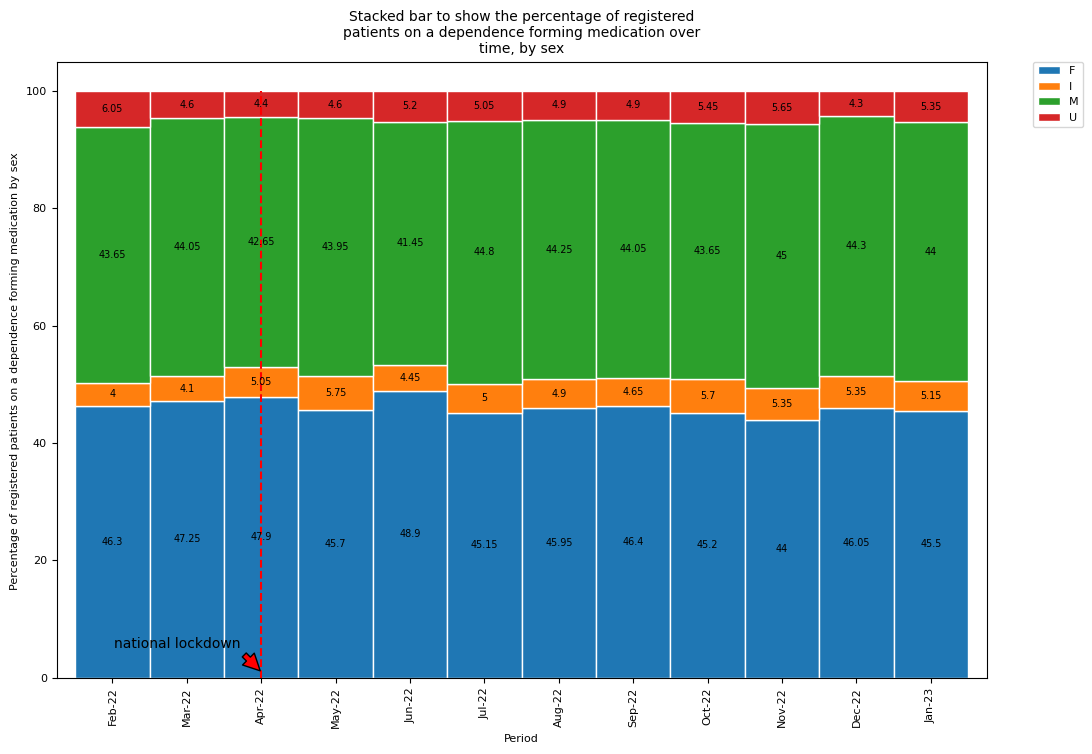

In [86]:
df_sex_stacked = pd.DataFrame(df_measure_dfm_medications_sex_rate)
df_sex_stacked.head()
tot = df_sex_stacked.sum(axis=1)
per = df_sex_stacked.div(tot, axis=0).mul(100).round(2)
ax = per.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients on a dependence forming medication by sex ', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=7)
title = 'Stacked bar to show the percentage of registered patients on a dependence forming medication over time, by sex'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_sex_rate_bar.png", bbox_inches='tight', dpi=150)
plt.show()

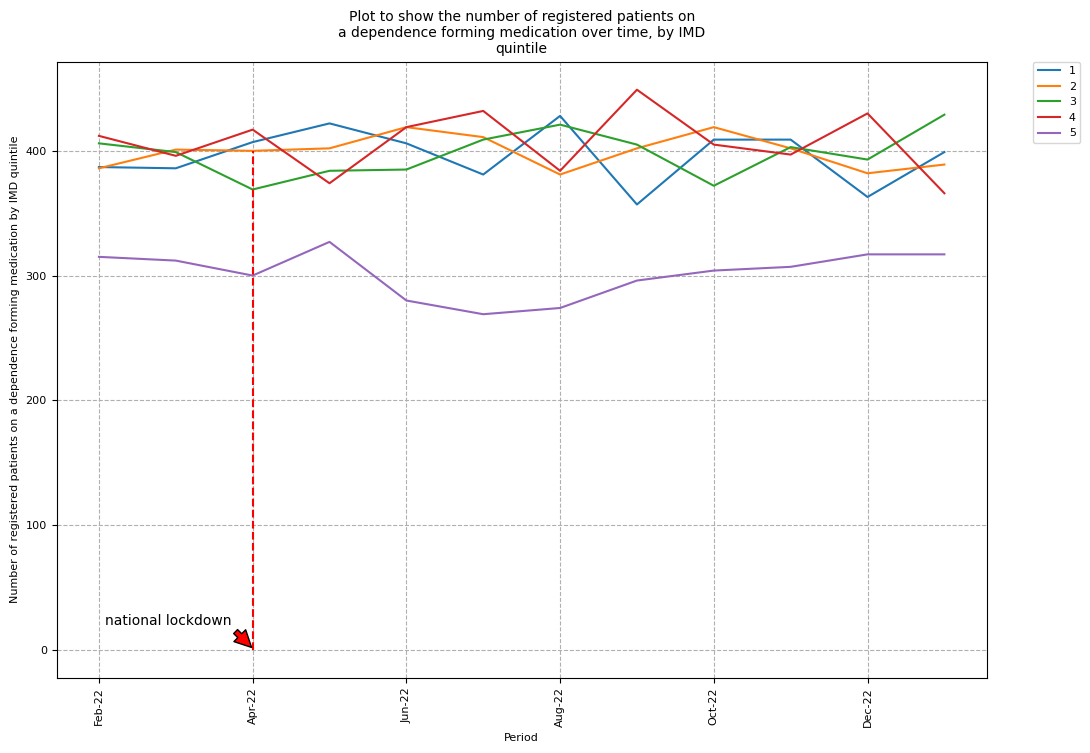

In [87]:
data_measure_dfm_medications_imd_rate = pd.read_csv("../output/measure_dfm_medications_by_imd_q5_rate.csv", parse_dates=["date"])
data_measure_dfm_medications_imd_rate = data_measure_dfm_medications_imd_rate.loc[data_measure_dfm_medications_imd_rate["imd_q5"] != "Unknown", :]
df_measure_dfm_medications_imd_rate = pd.DataFrame.pivot(data_measure_dfm_medications_imd_rate, index='date', columns='imd_q5', values='research_population')
df_measure_dfm_medications_imd_rate.index = pd.to_datetime(df_measure_dfm_medications_imd_rate.index).strftime('%b-%y')
ax = df_measure_dfm_medications_imd_rate.plot(fontsize=8, figsize=(12,8))
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication by IMD quintile', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=400,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=7)
title = 'Plot to show the number of registered patients on a dependence forming medication over time, by IMD quintile'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_imd_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()



In [88]:
print(tabulate(df_measure_dfm_medications_imd_rate.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_measure_dfm_medications_imd_rate.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      1    2    3    4    5
------  ---  ---  ---  ---  ---
Feb-22  387  386  406  412  315
date      1    2    3    4    5
------  ---  ---  ---  ---  ---
Jan-23  399  389  429  366  317


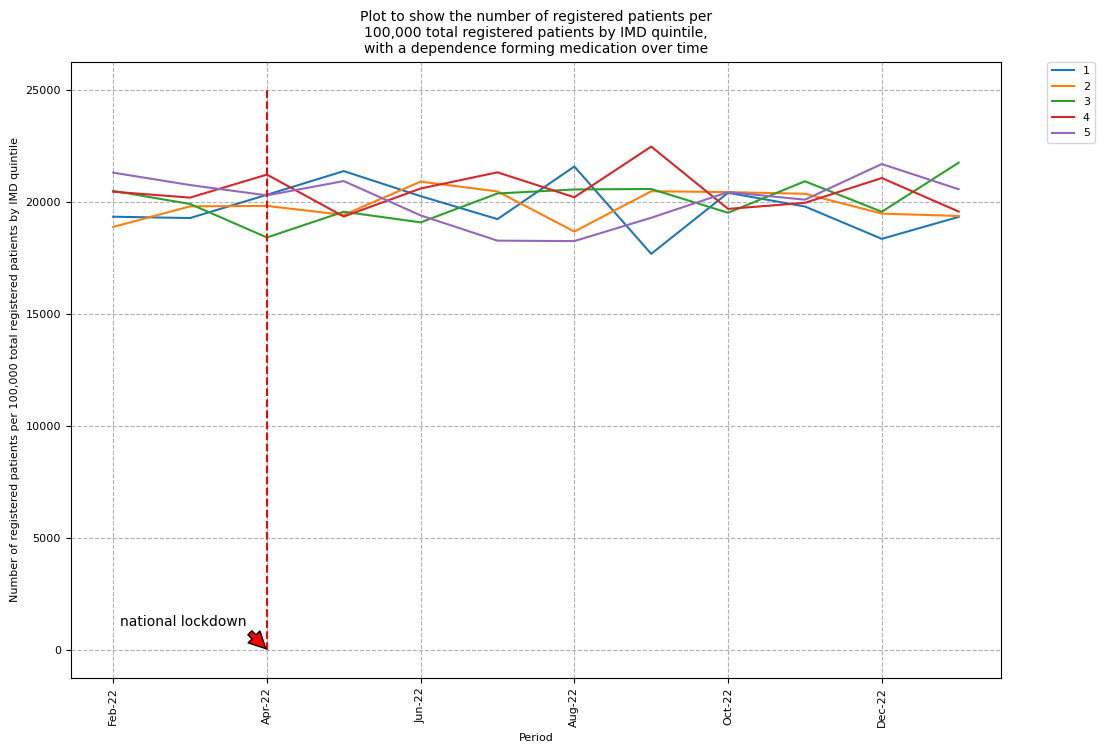

In [96]:
df_temp = pd.DataFrame(data_measure_dfm_medications_imd_rate)
df_imd_research_population=df_temp.assign(weighted_research_population=lambda x: x.research_population / (x.population / 100000))
df_imd_research_population = pd.DataFrame.pivot(df_imd_research_population, index='date', columns='imd_q5', values='weighted_research_population')
df_imd_research_population.index = pd.to_datetime(df_imd_research_population.index).strftime('%b-%y')
ax = df_imd_research_population.plot(fontsize=8, figsize=(12,8))
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients per 100,000 total registered patients by IMD quintile', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=25000,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=7)
title = 'Plot to show the number of registered patients per 100,000 total registered patients by IMD quintile, with a dependence forming medication over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_imd_weighted_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [90]:
print(tabulate(df_imd_research_population.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_imd_research_population.iloc[-1:], headers='keys', tablefmt = 'simple'))

date          1        2        3        4        5
------  -------  -------  -------  -------  -------
Feb-22  19330.7  18875.3  20484.4  20446.7  21298.2
date        1        2        3        4        5
------  -----  -------  -------  -------  -------
Jan-23  19322  19362.9  21743.5  19561.7  20557.7


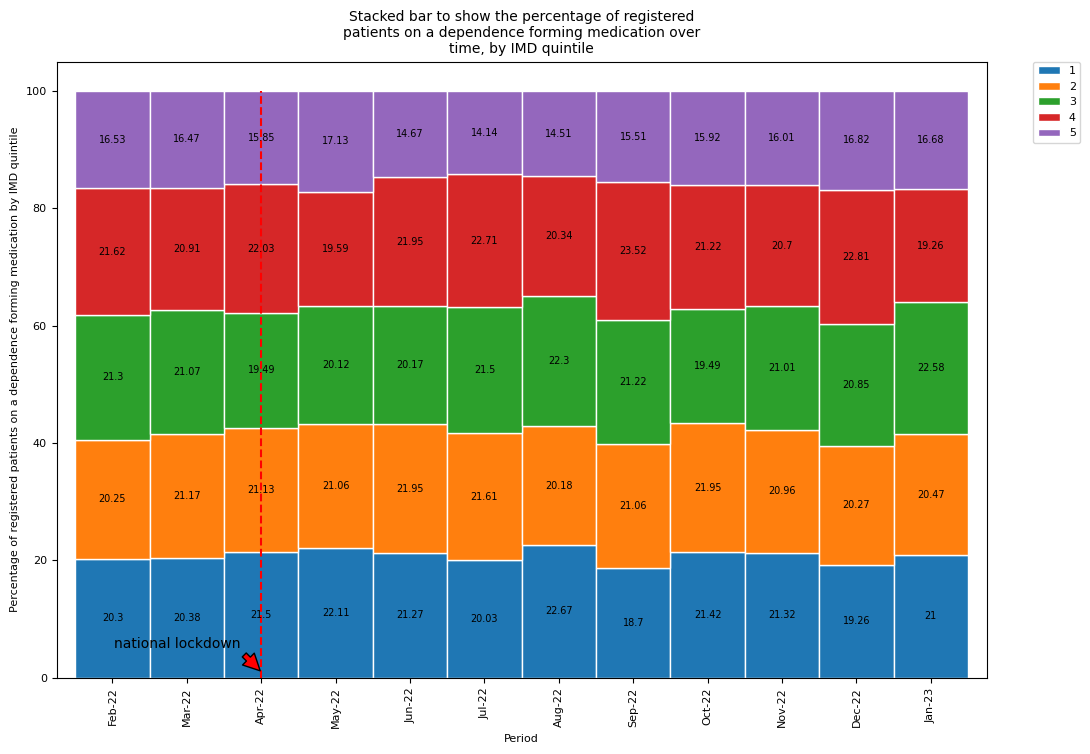

In [91]:
df_imd_stacked = pd.DataFrame(df_measure_dfm_medications_imd_rate)
df_imd_stacked.head()
tot = df_imd_stacked.sum(axis=1)
per = df_imd_stacked.div(tot, axis=0).mul(100).round(2)
ax = per.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients on a dependence forming medication by IMD quintile', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=7)
title = 'Stacked bar to show the percentage of registered patients on a dependence forming medication over time, by IMD quintile'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_imd_rate_bar.png", bbox_inches='tight', dpi=150)
plt.show()

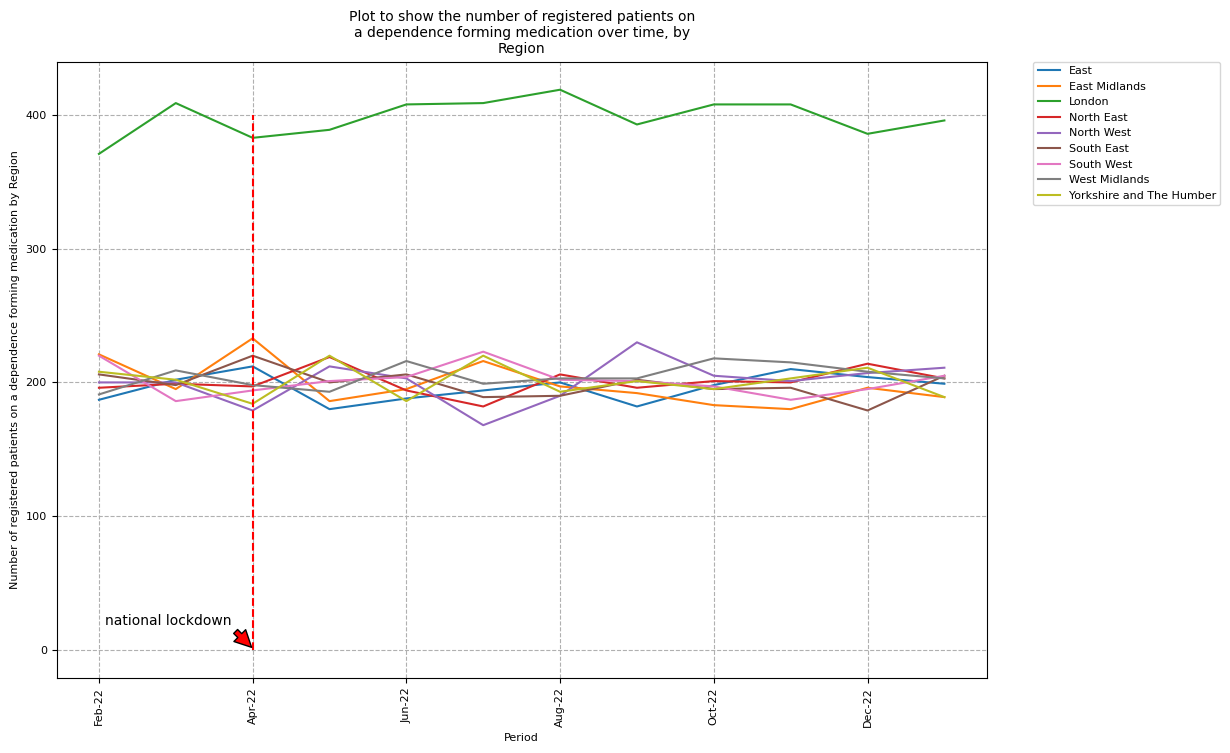

In [92]:
data_measure_dfm_medications_region_rate = pd.read_csv("../output/measure_dfm_medications_by_region_rate.csv", parse_dates=["date"])
#data_measure_dfm_medications_region_rate = data_measure_dfm_medications_region_rate.loc[data_measure_dfm_medications_region_rate["region"] != "Unknown", :]
df_measure_dfm_medications_region_rate = pd.DataFrame.pivot(data_measure_dfm_medications_region_rate, index='date', columns='region', values='research_population')
df_measure_dfm_medications_region_rate.index = pd.to_datetime(df_measure_dfm_medications_region_rate.index).strftime('%b-%y')
ax = df_measure_dfm_medications_region_rate.plot(fontsize=8, figsize=(12,8))
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication by Region', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=400,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=7)
title = 'Plot to show the number of registered patients on a dependence forming medication over time, by Region'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_region_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [93]:
print(tabulate(df_measure_dfm_medications_region_rate.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_measure_dfm_medications_region_rate.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Feb-22     187              221       371           196           200           206           220              191                         208
date      East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Jan-23     199              189       396           203           211           205           205              203                         189


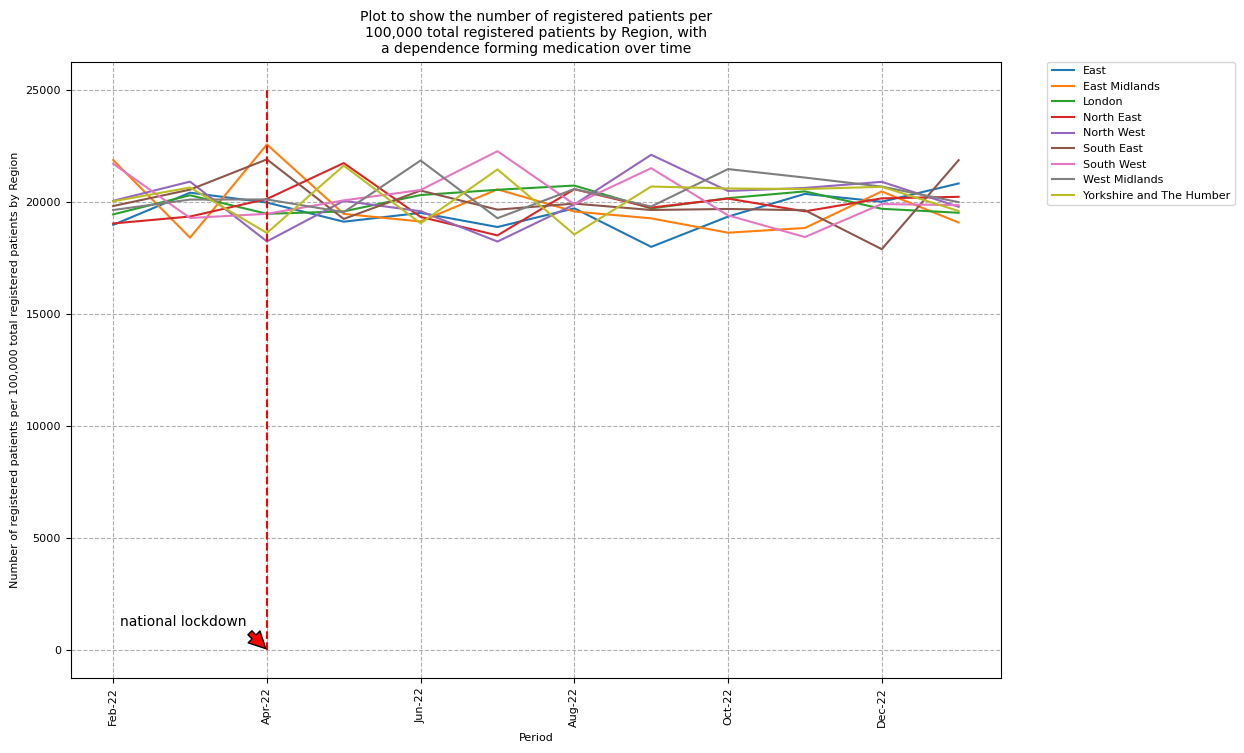

In [94]:
df_temp = pd.DataFrame(data_measure_dfm_medications_region_rate)
df_region_research_population=df_temp.assign(weighted_research_population=lambda x: x.research_population / (x.population / 100000))
df_region_research_population = pd.DataFrame.pivot(df_region_research_population, index='date', columns='region', values='weighted_research_population')
df_region_research_population.index = pd.to_datetime(df_region_research_population.index).strftime('%b-%y')
ax = df_region_research_population.plot(fontsize=8, figsize=(12,8))
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients per 100,000 total registered patients by Region', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=25000,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=7)
title = 'Plot to show the number of registered patients per 100,000 total registered patients by Region, with a dependence forming medication over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_region_weighted_plot.png", bbox_inches='tight', dpi=150)
plt.show()


In [95]:
print(tabulate(df_region_research_population.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_region_research_population.iloc[-1:], headers='keys', tablefmt = 'simple'))

date       East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  -------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Feb-22  18965.5          21859.5   19434.3       19029.1       20040.1       19807.7       21696.3            19630                     20019.2
date       East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  -------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Jan-23  20815.9          19071.6   19507.4       20219.1       19775.1         21855       19845.1          19980.3                     19585.5
